Drifting buoy data from the numerous existing campaigns supplements the analysis. These campaigns are
- FRAMZY (2002, 2007, 2008, 2009)
- ACSYS (2003)
- DAMOCLES (2007)
- N-ICE (2015)
- IABP (2010-2019 from Jenny, longer for WebData files)

Questions
- Have the data already been subjected to filtering?
    - depends on the dataset. check the raw.nc too
    
Tasks
- FRAMZY: Check whether the inertial oscillations are already filtered out. Subject to outlier check.
- ACSYS: Same as FRAMZY
- DAMOCLES: Try again to download (along with most other FRAMZY years)
- IABP: Lots of QC TLC needed. Approx 287 buoy tracks have at least one data point in the area, however much of those are ocean buoys not ice buoys (or are ice buoys that ESCAPED)
- N-ICE (2015): Pretty big chunk, relative dispersion actually possible here

In [1]:
import xarray as xr


/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import os
import pandas as pd

files = os.listdir('../data/FRAMZY/FRAMZY2002_calib_buoy/')
files = [f for f in files if f.split('_')[-1] != 'raw.nc']
files = [f for f in files if f.split('.')[-1] == 'nc']
framzy_buoys = {}
for file in files:
    with xr.open_dataset('../data/FRAMZY/FRAMZY2002_calib_buoy/' + file) as ds:
        framzy_buoys[file.replace('.nc', '')] = ds[['latitude', 'longitude']].to_dataframe()


/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/xarray/backends/plugins.py:65: RuntimeWarning: Engine 'rasterio' loading failed:
dlopen(/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/rasterio/_version.cpython-39-darwin.so, 0x0002): Library not loaded: @rpath/libLerc.4.dylib
  Referenced from: /opt/miniconda3/envs/drifter/lib/libgdal.31.dylib
  Reason: tried: '/opt/miniconda3/envs/drifter/lib/libLerc.4.dylib' (no such file), '/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/rasterio/../../../libLerc.4.dylib' (no such file), '/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/rasterio/../../../libLerc.4.dylib' (no such file), '/opt/miniconda3/envs/drifter/bin/../lib/libLerc.4.dylib' (no such file), '/opt/miniconda3/envs/drifter/bin/../lib/libLerc.4.dylib' (no such file), '/usr/local/lib/libLerc.4.dylib' (no such file), '/usr/lib/libLerc.4.dylib' (no such file)
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [3]:
files = os.listdir('../data/ACSYS2003_calib_buoy/')
files = [f for f in files if f.split('_')[-1] != 'raw.nc']
files = [f for f in files if f.split('.')[-1] == 'nc']
acsys_buoys = {}
for file in files:
    with xr.open_dataset('../data/ACSYS2003_calib_buoy/' + file) as ds:
        acsys_buoys[file.replace('.nc', '')] = ds[['latitude', 'longitude']].to_dataframe()



In [19]:
import json

files = os.listdir('../data/npolar.2015.6ed9a8ca-data/')
files = [f for f in files if f.split('.')[-1] == 'json']
nice2015_data = {}
for file in files:
    nice2015_data[file.replace('.json', '')] = pd.DataFrame(data = json.load(open('../data/npolar.2015.6ed9a8ca-data/' + file))['geometry']['coordinates'],
                  columns=['longitude', 'latitude'])


In [29]:
file

'IABP2009.mat'

In [68]:
# jenny's iabp data
# still pretty messy from what I can tell
from scipy.io import loadmat
import numpy as np

iabp_data = {}
files = os.listdir('../data/JennyProcessed_IABP/')
for file in files:
    data = loadmat('../data/JennyProcessed_IABP/' + file)[file.replace('.mat', '')]
    ndata = {n: data[n][0] for n in data.dtype.names}

    for idx in range(len(ndata['name'])):
        try:
            df = pd.DataFrame({c: np.concatenate(ndata[c][idx]) for c in data.dtype.names[1:]})
            df['id'] = df['id'].astype(int)
            df['date'] = pd.Series([pd.to_datetime(str(y) + '-01-01 00:00') + pd.to_timedelta(x, unit='days') 
                  for x, y in zip(df.yday, df.year)]).round('1min')

            df.rename({'lat': 'latitude',
                  'lon': 'longitude'}, axis=1, inplace=True)
            df.loc[df.latitude > 90, 'latitude'] = np.nan
            df.loc[df.latitude < 60, 'latitude'] = np.nan           
            df = df.where(df.flag == 0).dropna(subset=['latitude', 'longitude'])
            if len(df) > 0:
                iabp_data[ndata['name'][idx][0]] = df
        except:
            pass
        

In [69]:
for buoy in iabp_data:
    print(buoy, len(iabp_data[buoy].loc[iabp_data[buoy].flag==0]))

pos300234010085650 1682
pos300234011585520 1445
pos300234011970450 77
pos300234011970460 19
pos300025010024370 6834
pos300025010124230 3914
pos300025010125010 10337
pos300025010227140 17582
pos300025010917990 12193
pos300025060607470 1174
pos300234011880340 1122
pos300234011881340 1575
pos300234011882350 167
pos300234011883240 1251
pos300234011885340 918
pos300234011888330 1344
pos300234011889340 1627
pos300234062323360 3371
pos300234062326370 889
pos300234062855890 460
pos300234062883920 145
pos300234062884800 1604
pos300234062952220 729
pos300234063251870 834
pos300234063359020 239
pos300234063730900 3109
pos300234063804010 1
pos300234063806010 24
pos300234063949730 1636
pos300234063949810 1223
pos300234064501660 1528
pos300234064502570 1295
pos300234064502600 2346
pos300234064506420 6441
pos300234064809090 5
pos300234065063980 3169
pos300234065067310 3049
pos300234065164080 3135
pos300234065169390 3127
pos300234065315990 4277
pos300234065493190 2179
pos300234065493200 679
pos3002340

/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


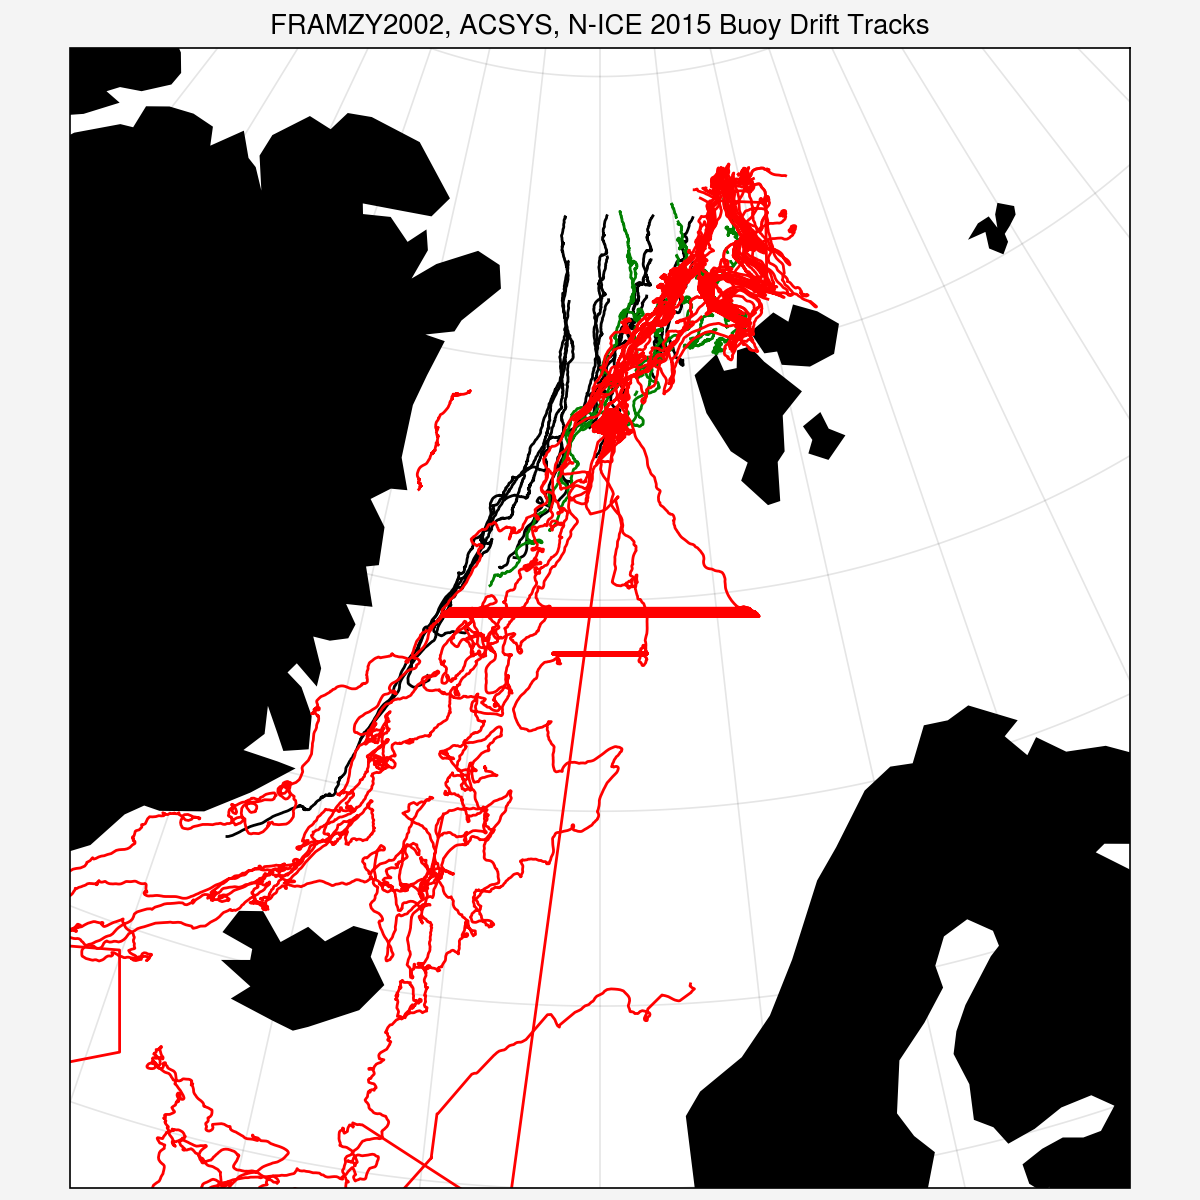

In [20]:
import proplot as pplt
fig, ax = pplt.subplots(width=6, height=6, proj='lcc', proj_kw={'lon_0': 0})
ax.format(land=True, lonlim=(-30, 30), latlim=(60, 85))
for buoy in framzy_buoys:
    ax.plot(framzy_buoys[buoy].longitude, 
            framzy_buoys[buoy].latitude, color='k', lw=1)
for buoy in acsys_buoys:
    ax.plot(acsys_buoys[buoy].longitude, 
            acsys_buoys[buoy].latitude, color='g', lw=1)
for buoy in nice2015_data:
    ax.plot(nice2015_data[buoy].longitude, 
            nice2015_data[buoy].latitude, color='r', lw=1)
ax.format(title='FRAMZY2002, ACSYS, N-ICE 2015 Buoy Drift Tracks')

In [76]:
fram_iabp = []
for buoy in iabp_data:
    lat = iabp_data[buoy]['latitude']
    lon = iabp_data[buoy]['longitude']
    if np.any((lon < 30) & (lon > -30)):
        if np.any((lat < 85)):
            fram_iabp.append(buoy)
len(fram_iabp)

287

/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


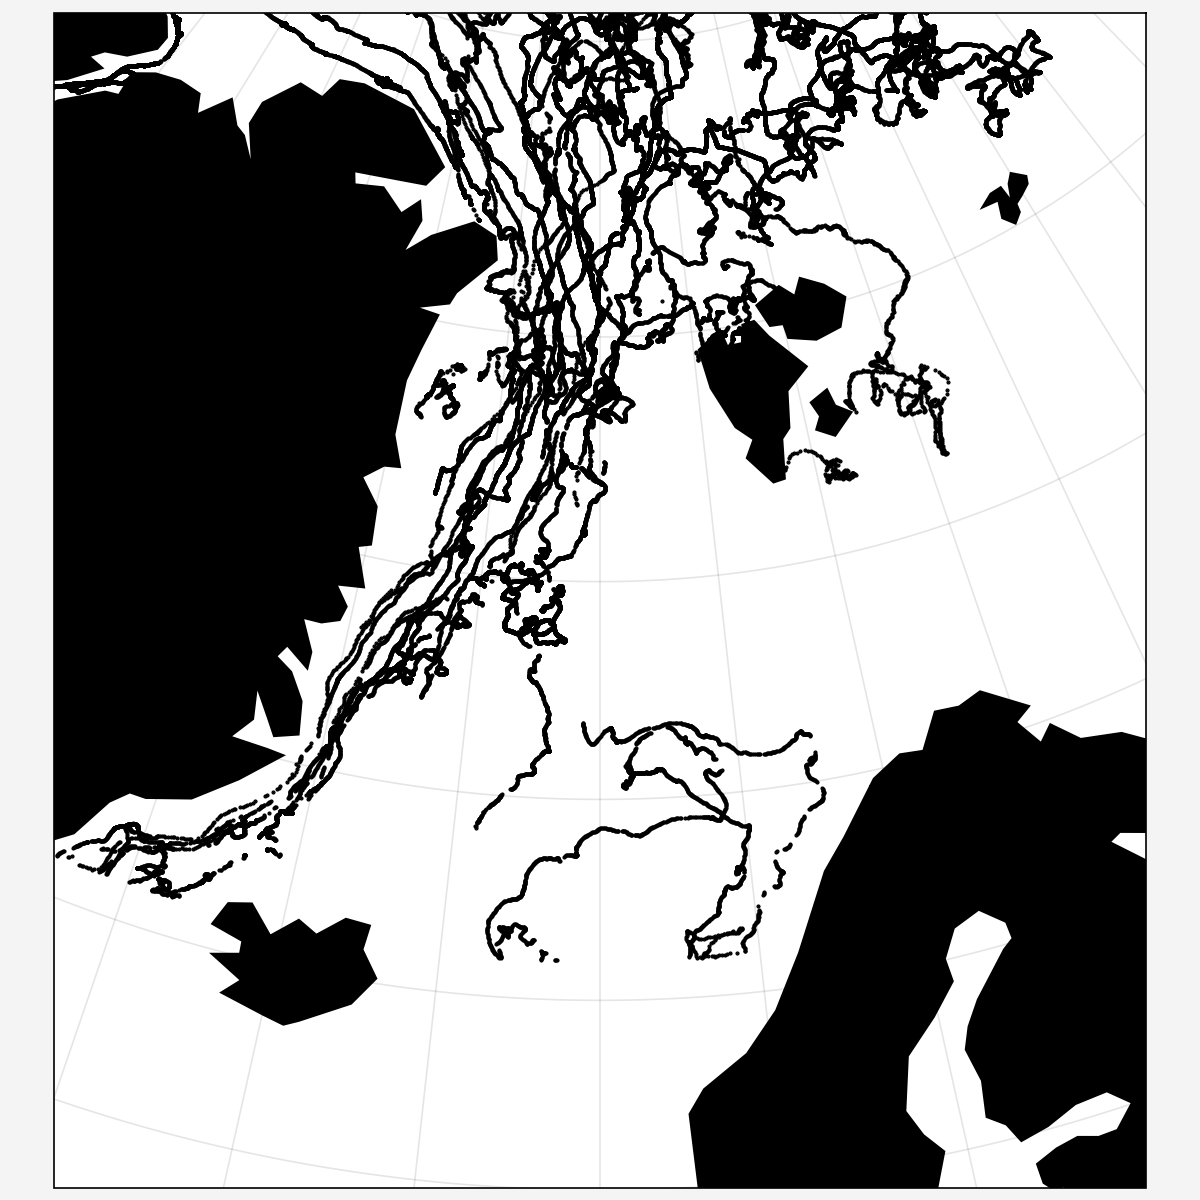

In [84]:
fig, ax = pplt.subplots(width=6, height=6, proj='lcc', proj_kw={'lon_0': 0})
ax.format(land=True, lonlim=(-30, 30), latlim=(60, 85))

for buoy in fram_iabp[250:]:
    df = iabp_data[buoy]
    if len(df.dropna()) > 300:
        ax.plot(df.longitude, 
            df.latitude, color='k', lw=0, marker='.', markersize=1)



# IABP WebData
I downloaded 1.2 GB of files from the IABP website from the WebData folder. This contains data from 2009 to the present (including MOSAiC, maybe including N-ICE 2015). As a first pass, I go through each folder and select all the names of files that include some data within the study region. The list of these buoys is then passed to a copy function, that copies the data to the Relative Dispersion folder.

In [11]:
import os
import numpy as np
import pandas as pd
init_loc = '/Users/dwatkin2/Documents/research/packages/buoy_processing/data/WebData/'
save_loc = '/Users/dwatkin2/Documents/research/manuscripts/relative_dispersion/data/buoy_data/iabp_webdata/'
years = [f for f in os.listdir(init_loc) if f != '.DS_Store']

In [15]:
years.sort()
copy_paths = []
for year in years:
    files = [f for f in os.listdir(init_loc + year)]
    print(year, 'n=' + str(len(files)))
    for file in files:
        df = pd.read_csv(init_loc + year + '/' + file)
        lat = df['Lat']
        lon = df['Lon']
        if np.any((lon < 30) & (lon > -30)):
            if np.any((lat < 85)):
                copy_paths.append(init_loc + year + '/' + file)


2009 n=0
2010 n=3
2011 n=44
2012 n=104
2013 n=112
2014 n=285
2015 n=171
2016 n=138
2017 n=88
2018 n=236
2019 n=341
2020 n=217
2021 n=253
2022 n=38


In [29]:
for path in copy_paths:
    year = path.split('/')[-2]
    file = path.split('/')[-1]
    new_path = save_loc + 'IABP_' + year + '_' + file
    ! cp $path $new_path


2022

# Applying QC algorithm to MOSAiC data

In [1]:
import numpy as np
import os
import pandas as pd
import pyproj
from scipy.interpolate import interp1d
import sys
sys.path.append('/Users/dwatkin2/Documents/research/packages/buoy_processing/drifter')
import xarray as xr

from importlib import reload
import utilities.analysis as anls
import utilities.cleaning as clean
import utilities.interpolation as interp
clean = reload(clean)
interp = reload(interp)



In [3]:
#### Parameters ####
saveloc = '../data/buoy_data_qc/'
max_speed = 1.5 # m/s
min_size = 24 * 30 # number of observations to equal 30 days of observations
gap_window = '24H'
gap_threshold = 11 # Need at least this many observations within each centered window

min_lon = -30 # If no data between min_lon, max_lon, then skip
max_lon = 30

#### Threshold function used to determine if track is inside sea ice region ####
sic_thresh = pd.read_csv('../data/sea_ice_extent_threshold.csv', names=['longitude', 'latitude']).dropna()
sic_thresh -= 1 # Extend a little to the south
sic_test = interp1d(sic_thresh.longitude, sic_thresh.latitude, bounds_error=False)

In [4]:
#### Define QC algorithm ####
def standard_qc(buoy_df,
                max_speed=max_speed,
                min_size=min_size,
                gap_threshold=gap_threshold,
                gap_window=gap_window):
    """QC steps applied to all buoy data.
    1. Check for duplicated dates
    2. Check for duplicated positions
    3. Compute min/max speed
    """
    flag_date = clean.check_dates(buoy_df, date_index=True)
    flag_pos = clean.check_duplicate_positions(buoy_df, date_index=True)
    buoy_df = buoy_df.loc[~flag_date & ~flag_pos]
    buoy_df = clean.calc_speed_for_outlier_check(buoy_df, date_index=True)

    # global speed check
    flag_speed = buoy_df.speed > max_speed
    buoy_df = buoy_df.loc[~flag_speed]

    # Restrict to sea ice regions
    buoy_df = buoy_df.loc[buoy_df.latitude > sic_test(buoy_df.longitude)]
    
    # Remove data surrounded by too-large gaps
    flag_gap = clean.check_dates(buoy_df,
                                 check_gaps=True,
                                 date_index=True,
                                 gap_window=gap_window,
                                 gap_threshold=gap_threshold)
    buoy_df = buoy_df.loc[~flag_gap]

    # check if any data in study region then
    # align to hourly
    if len(buoy_df.loc[(buoy_df.longitude > min_lon) & \
                  (buoy_df.longitude <= max_lon)]) > min_size:
        buoy_df = interp.regrid_buoy_track(
                            buoy_df, precision='1H').loc[:,
                                   ['longitude', 'latitude']]
        flag_gap = clean.check_dates(buoy_df,
                                     check_gaps=True,
                                     date_index=True,
                                     gap_window=gap_window,
                                     gap_threshold=gap_threshold)
        buoy_df = buoy_df.loc[~flag_gap]
        buoy_df = clean.calc_speed_for_outlier_check(buoy_df, date_index=True)
        if len(buoy_df) > min_size:
            return buoy_df.loc[:,
                 ['latitude', 'longitude', 'x', 'y', 'speed']].dropna()
        else:
            return None
    else:
        return None

In [70]:
#### MOSAiC ####
dataloc = '../data/buoy_data/MOSAiC_tracks_v2/'
files = os.listdir(dataloc)
files = [f for f in files if f != '.DS_Store']
ts = slice('2020-07-01', '2020-10-01')
mosaic_data = {}
for file in files:
    df = pd.read_csv(dataloc + file, index_col='datetime', parse_dates=True)
    df = df.sort_index()
    df = df.loc[ts,:]
    if len(df) > 24*40:
        df_clean = standard_qc(df)

        if df_clean is not None:
            mosaic_data['MOSAiC_' + file.replace('.csv', '')] = df_clean.dropna()



In [83]:
# Preparing interpolated and filtered dataset
# Some tracks we trim
mosaic_data['2019P112'] = mosaic_data['2019P112'].loc[slice('2020-08-01', '2020-10-01')]
mosaic_data['2019P113'] = mosaic_data['2019P113'].loc[slice('2020-08-01', '2020-10-01')]

In [84]:
mosaic_data = {b.split('_')[-1]: mosaic_data[b] for b in mosaic_data}

In [116]:
mosaic_data_interp = {}
for buoy in mosaic_data:
    buoy_df = mosaic_data[buoy]
    buoy_df = anls.compute_speed(buoy_df, date_index=True, rotate_uv=True, difference='centered')
    buoy_df_interp = interp.interpolate_buoy_track(buoy_df,
                                        xvar='longitude', yvar='latitude',
                                                  freq='1H', maxgap_minutes=3*60)
    #buoy_df_interp = buoy_df_interp.rolling('12H', center=True).mean()
    buoy_df_interp = anls.compute_speed(buoy_df_interp, date_index=True, rotate_uv=True, difference='centered')
    mosaic_data[buoy] = buoy_df
    mosaic_data_interp[buoy] = buoy_df_interp

In [117]:
for buoy in mosaic_data_interp:
    mosaic_data_interp[buoy].to_csv('../data/buoy_data_smoothed/' + buoy + '.csv')

2019P136


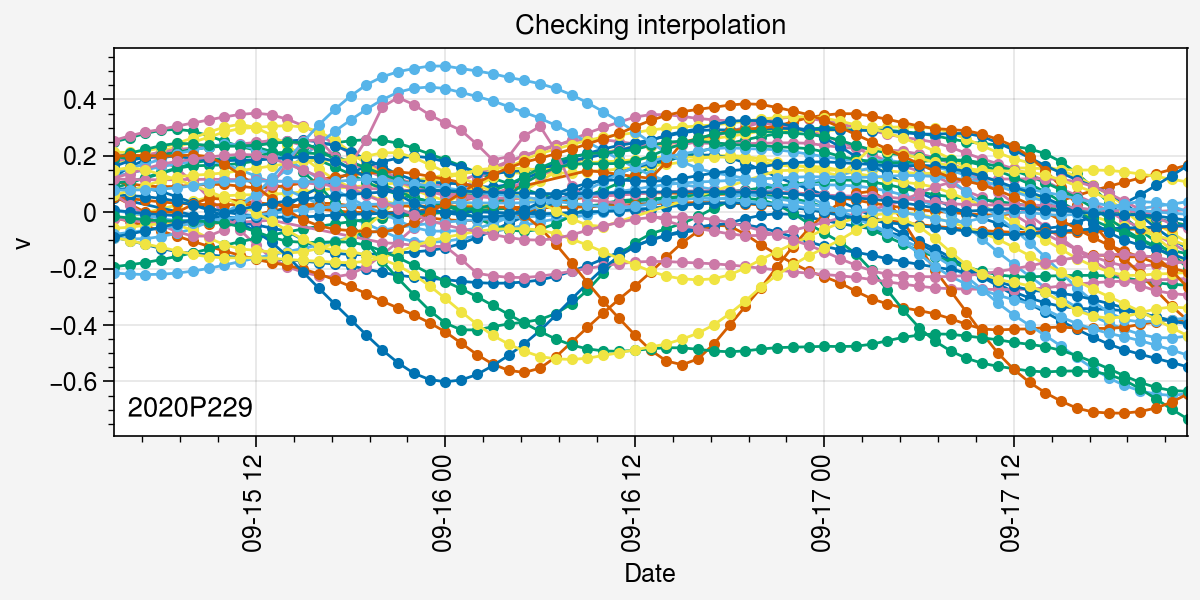

In [113]:
import proplot as pplt
fig, ax = pplt.subplots(width=6, height=3)
for buoy in mosaic_data:
    buoy_df = mosaic_data[buoy]
    buoy_df_interp = mosaic_data_interp[buoy]
    timeslice = slice('2020-09-15', '2020-09-17')
    if len(buoy_df.loc[timeslice]) > 0:
        if buoy_df['v'].max() > 1:
            print(buoy)
        ax.plot(buoy_df_interp.loc[timeslice, 'v'],
                marker='o', ms=3, lw=1)
#         ax.plot(buoy_df.loc[timeslice, 'v'],
#                 marker='.', ms=1, lw=0.5, color='r')
        # ax2 = ax.twinx()
        # ax2.plot(buoy_df.loc[timeslice, 'x'] - buoy_df.loc[timeslice, 'x'].rolling(3, center=True).median(),
        #         lw=0.5, color='r')
        ax.format(xlabel='Date', ylabel='v',
                  title='Checking interpolation', lltitle=buoy)


/opt/miniconda3/envs/drifter/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:406: UserWarning: The `map_projection` keyword argument is deprecated, use `projection` to instantiate a GeoAxes instead.
  warnings.warn("The `map_projection` keyword argument is "


<a list of 1 Line2D objects>

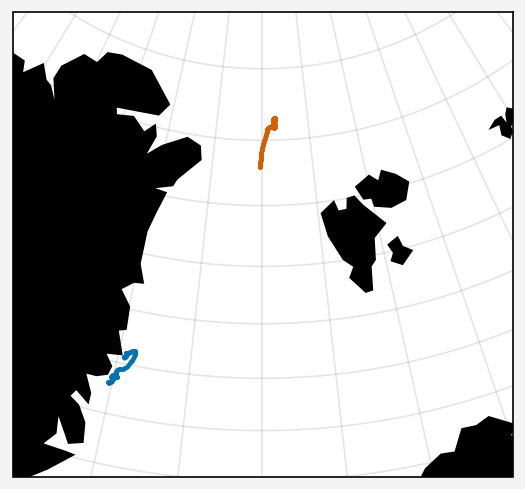

In [112]:
fig, ax = pplt.subplots(proj='lcc', proj_kw={'lon_0': 0})
ax.format(lonlim=(-30, 30), latlim=(70,85), land=True)
ts = slice('2020-09-15', '2020-09-25')
ax.plot(mosaic_data_interp['2019P136'].longitude.loc[ts],
        mosaic_data_interp['2019P136'].latitude.loc[ts],
        lw=0.5, marker='.', ms=1)
ax.plot(mosaic_data_interp['2019P112'].longitude.loc[ts],
        mosaic_data_interp['2019P112'].latitude.loc[ts],
        lw=0.5, marker='.', ms=1)

